## About Dataset
Food delivery is a courier service in which a restaurant, store, or independent food-delivery company delivers food to a customer. An order is typically made either through a restaurant or grocer's website or mobile app, or through a food ordering company. The delivered items can include entrees, sides, drinks, desserts, or grocery items and are typically delivered in boxes or bags. The delivery person will normally drive a car, but in bigger cities where homes and restaurants are closer together, they may use bikes or motorized scooters.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import warnings
warnings.filterwarnings("ignore")


## DATA LOADING

In [ ]:
df=pd.read_csv('/content/train.csv')

## DATA CLEANING

In [ ]:
df.head()


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [ ]:
df.shape

(45593, 20)

In [ ]:
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant_latitude,45593.0,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
Restaurant_longitude,45593.0,70.231332,22.883647,-88.366217,73.170000,75.898497,78.044095,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.010000,73.280000,76.002574,78.107044,88.563452
Vehicle_condition,45593.0,1.023359,0.839065,0.000000,0.000000,1.000000,2.000000,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [ ]:
# int('(min) 24'.split(' ')[1].strip()) =24
# conditions Sunny =Sunny


In [ ]:
# type(df['Time_taken(min)'])

## Feature Engineering and Data Cleaning

In [ ]:
#Extract relevant values from column
# def extract_column_value(df):
    #Extract time and convert to int
    # (min) 24-->24
    # splitting it on the space taking the 2nd one of the list[(min),24]
    # and strip the space
df['Time_taken(min)'] = df['Time_taken(min)'].astype(str).apply(lambda x: int(x.split(' ')[1].strip()))
    #Extract Weather conditions
df['Weather_conditions'] = df['Weatherconditions'].apply(lambda x: x.split(' ')[1].strip())
    #Extract city code from Delivery person ID
df['City_code']=df['Delivery_person_ID'].str.split("RES", expand=True)[0]
    # without it retures a np array

# extract_column_value(df)
df[['Time_taken(min)','Weather_conditions','City_code']].head()

,Time_taken(min),Weather_conditions,City_code
0,24,Sunny,INDO
1,33,Stormy,BANG
2,26,Sandstorms,BANG
3,21,Sunny,COIMB
4,30,Cloudy,CHEN


In [ ]:
df.drop(['ID','Delivery_person_ID'],axis=1,inplace=True)
# now that we have extraceted the City_code from Delivery_person_ID we can drop it
# id is unique for everything so dropping it

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Delivery_person_Age'] = df['Delivery_person_Age'].astype('float64')
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype('float64')
df['multiple_deliveries'] = df['multiple_deliveries'].astype('float64')
df['Order_Date']=pd.to_datetime(df['Order_Date'],format="%d-%m-%Y")


In [ ]:
df.replace('NaN', float(np.nan), regex=True,inplace=True)

In [ ]:
df.isnull().sum()

Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
Weather_conditions              616
City_code                         0
dtype: int64

In [ ]:
# Here, by using a common approach to handle the data and filling in the necessary missing values,
#  the accuracy of the dataset can be improved at a later stage.
# Since it is a large dataset and all the missing parameters are below 3%, a simple method can be used to replace them.
# This approach can be discussed with a domain expert and further enhanced as needed.

df['Delivery_person_Age'].fillna(np.random.choice(df['Delivery_person_Age']), inplace=True)
df['Weather_conditions'].fillna(np.random.choice(df['Weather_conditions']), inplace=True)
df['City'].fillna(df['City'].mode()[0], inplace=True)
df['Festival'].fillna(df['Festival'].mode()[0], inplace=True)
df['multiple_deliveries'].fillna(df['multiple_deliveries'].mode()[0], inplace=True)
df['Road_traffic_density'].fillna(df['Road_traffic_density'].mode()[0], inplace=True)
df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].median(), inplace=True)


## Creating time based features

In [ ]:
df["day"] = df.Order_Date.dt.day
df["month"] = df.Order_Date.dt.month
df["quarter"] = df.Order_Date.dt.quarter
df["year"] = df.Order_Date.dt.year
df['day_of_week'] = df.Order_Date.dt.day_of_week.astype(int)
df["is_month_start"] = df.Order_Date.dt.is_month_start.astype(int)
df["is_month_end"] = df.Order_Date.dt.is_month_end.astype(int)
df["is_quarter_start"] = df.Order_Date.dt.is_quarter_start.astype(int)
df["is_quarter_end"] = df.Order_Date.dt.is_quarter_end.astype(int)
df["is_year_start"] = df.Order_Date.dt.is_year_start.astype(int)
df["is_year_end"] = df.Order_Date.dt.is_year_end.astype(int)
df['is_weekend'] = np.where(df['day_of_week'].isin([5,6]),1,0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Delivery_person_Age          45593 non-null  float64       
 1   Delivery_person_Ratings      45593 non-null  float64       
 2   Restaurant_latitude          45593 non-null  float64       
 3   Restaurant_longitude         45593 non-null  float64       
 4   Delivery_location_latitude   45593 non-null  float64       
 5   Delivery_location_longitude  45593 non-null  float64       
 6   Order_Date                   45593 non-null  datetime64[ns]
 7   Time_Orderd                  43862 non-null  object        
 8   Time_Order_picked            45593 non-null  object        
 9   Weatherconditions            44977 non-null  object        
 10  Road_traffic_density         45593 non-null  object        
 11  Vehicle_condition            45593 non-nu

In [ ]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,...,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,conditions Sunny,...,1,2022,5,0,0,0,0,0,0,1
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,conditions Stormy,...,1,2022,4,0,0,0,0,0,0,0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,conditions Sandstorms,...,1,2022,5,0,0,0,0,0,0,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,conditions Sunny,...,2,2022,1,0,0,0,0,0,0,0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,conditions Cloudy,...,1,2022,5,0,0,0,0,0,0,1


In [ ]:
df['Time_Orderd']=pd.to_timedelta(df['Time_Orderd'])
df['Time_Order_picked']=pd.to_timedelta(df['Time_Order_picked'])

In [ ]:
# Need to add data as there are some food which took more than 12 hour to reach the destination

In [ ]:
# time delta is the difference in dime
# datetime represent actual time



# when customer picked the order
df['Time_Order_picked_formatted']= df['Order_Date']+df['Time_Order_picked']
# converting things to time delta to get a good understanding

# when seller picked the order
df['Time_Order_formatted'] = df['Order_Date']+ df['Time_Orderd']

# finding their difference
df['order_prepare_time_diff_mins']=((df['Time_Order_picked_formatted']- df['Time_Order_formatted']).dt.total_seconds())/60

In [ ]:
df.drop(columns=['Time_Order_picked_formatted','Time_Order_formatted','Order_Date','Time_Order_picked','Time_Orderd'],inplace=True)

In [ ]:
# Time_Orderd  is the source of  Time_Ordered_formatted and  order_prepare_time_diff_mins
# so deleting it from the data


## Creating new features on the basis of latitude and longitude

In [ ]:
# finding the distance between customer and the resturant

In [ ]:

import geopy.distance

In [ ]:
def distance_between(lat1, lon1, lat2, lon2):
  coords_1 = (lat1, lon1)
  coords_2 = (lat2, lon2)
  return geopy.distance.distance(coords_1, coords_2).km

# df['distance'] = distance_between(df['Restaurant_latitude'], df['Restaurant_longitude'], df['Delivery_location_latitude'], df['Delivery_location_longitude'])

In [ ]:
df['distance'] = df.apply(lambda row: distance_between(row['Restaurant_latitude'], row['Restaurant_longitude'], row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)

In [ ]:
df['distance']

0         3.020737
1        20.143737
2         1.549693
3         7.774497
4         6.197898
           ...    
45588     1.488112
45589    10.983242
45590     4.648024
45591     6.219668
45592    12.057294
Name: distance, Length: 45593, dtype: float64

In [ ]:
df.isnull().sum()

Delivery_person_Age                0
Delivery_person_Ratings            0
Restaurant_latitude                0
Restaurant_longitude               0
Delivery_location_latitude         0
Delivery_location_longitude        0
Weatherconditions                616
Road_traffic_density               0
Vehicle_condition                  0
Type_of_order                      0
Type_of_vehicle                    0
multiple_deliveries                0
Festival                           0
City                               0
Time_taken(min)                    0
Weather_conditions                 0
City_code                          0
day                                0
month                              0
quarter                            0
year                               0
day_of_week                        0
is_month_start                     0
is_month_end                       0
is_quarter_start                   0
is_quarter_end                     0
is_year_start                      0
i

In [ ]:
df['Weatherconditions'].fillna('missing', inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43862 entries, 0 to 45592
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Delivery_person_Age           43862 non-null  float64
 1   Delivery_person_Ratings       43862 non-null  float64
 2   Restaurant_latitude           43862 non-null  float64
 3   Restaurant_longitude          43862 non-null  float64
 4   Delivery_location_latitude    43862 non-null  float64
 5   Delivery_location_longitude   43862 non-null  float64
 6   Weatherconditions             43862 non-null  object 
 7   Road_traffic_density          43862 non-null  object 
 8   Vehicle_condition             43862 non-null  int64  
 9   Type_of_order                 43862 non-null  object 
 10  Type_of_vehicle               43862 non-null  object 
 11  multiple_deliveries           43862 non-null  float64
 12  Festival                      43862 non-null  object 
 13  C

In [ ]:
obj = df.select_dtypes(include='object').columns

In [ ]:
obj

Index(['Weatherconditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City', 'Weather_conditions',
       'City_code'],
      dtype='object')

## One-hot encoding

In [ ]:
df = pd.get_dummies(df,columns=obj,drop_first=True)
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken(min),day,...,City_code_KNP,City_code_KOC,City_code_KOL,City_code_LUDH,City_code_MUM,City_code_MYS,City_code_PUNE,City_code_RANCHI,City_code_SUR,City_code_VAD
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2,0.0,24,19,...,0,0,0,0,0,0,0,0,0,0
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2,1.0,33,25,...,0,0,0,0,0,0,0,0,0,0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,0,1.0,26,19,...,0,0,0,0,0,0,0,0,0,0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,0,1.0,21,5,...,0,0,0,0,0,0,0,0,0,0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,1,1.0,30,26,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Time_taken(min)', axis=1)
y = df['Time_taken(min)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (35089, 64)
y_train shape: (35089,)
X_test shape: (8773, 64)
y_test shape: (8773,)


In [ ]:
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# configure to select all features
fs = SelectKBest(score_func=chi2, k='all')
# learn relationship from training data
fs.fit(abs(X), y)
# transform train input data
X_train_fs = fs.transform(X)
# transform test input data
# X_test_fs = fs.transform(X_test)
for i in range(len(fs.scores_)):
	print('Feature %s: %f' % (X.columns[i], fs.scores_[i]))
# plot the scores
# plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
# plt.show()

Feature Delivery_person_Age: 5428.786839
Feature Delivery_person_Ratings: 206.603452
Feature Restaurant_latitude: 122.448258
Feature Restaurant_longitude: 228.269215
Feature Delivery_location_latitude: 127.843342
Feature Delivery_location_longitude: 229.543765
Feature Vehicle_condition: 2392.585337
Feature multiple_deliveries: 2845.395727
Feature day: 390.579830
Feature month: 6.034908
Feature quarter: 4.889024
Feature year: 0.000000
Feature day_of_week: 71.963639
Feature is_month_start: 333.074176
Feature is_month_end: 178.821151
Feature is_quarter_start: 189.844833
Feature is_quarter_end: 178.821151
Feature is_year_start: nan
Feature is_year_end: nan
Feature is_weekend: 34.412538
Feature order_prepare_time_diff_mins: 222791.532227
Feature distance: 116666.306670
Feature Weatherconditions_conditions Fog: 973.866912
Feature Weatherconditions_conditions Sandstorms: 261.171789
Feature Weatherconditions_conditions Stormy: 280.739970
Feature Weatherconditions_conditions Sunny: 2157.673495


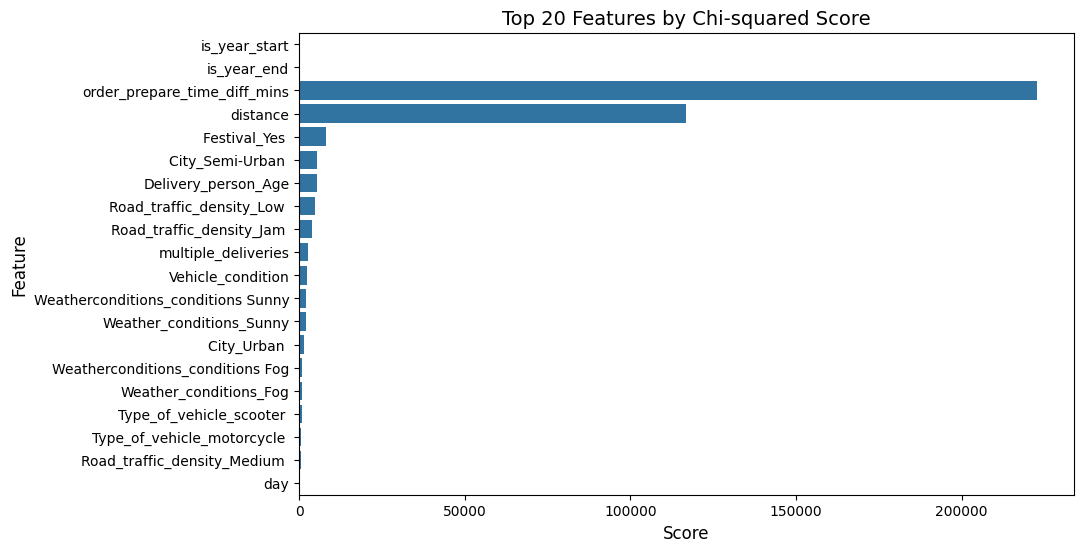

In [ ]:
features_and_scores = sorted(zip(fs.scores_, X.columns), reverse=True)[:20]

# Create a bar plot of the features and their scores
plt.figure(figsize=(10, 6))
sns.barplot(x=[score for score, _ in features_and_scores],
            y=[feature for _, feature in features_and_scores])
plt.xlabel('Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 20 Features by Chi-squared Score', fontsize=14)
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import time
models = [
    # LinearRegression(),
    # Ridge(),
    # Lasso(),
    # ElasticNet(),
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    SVR(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
    AdaBoostRegressor()
]

model_list = []
r2_list = []

for model in models:
    # Start timer
    start_time = time.time()

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print model name and evaluation metrics
    model_name = model.__class__.__name__
    print(f"Model: {model_name}")
    print(f"- RMSE: {np.sqrt(mse):.4f}")
    print(f"- MSE: {mse:.4f}")
    print(f"- MAE: {mae:.4f}")
    print(f"- R2 Score: {r2:.4f}")
    print(f"--- Execution time: {time.time() - start_time:.4f} seconds ---")

    # Store model and R2 score
    model_list.append(model)
    r2_list.append(r2)


Model: DecisionTreeRegressor
- RMSE: 5.2525
- MSE: 27.5887
- MAE: 4.0264
- R2 Score: 0.6855
--- Execution time: 0.7479 seconds ---
Model: KNeighborsRegressor
- RMSE: 8.5514
- MSE: 73.1272
- MAE: 6.7947
- R2 Score: 0.1664
--- Execution time: 3.7192 seconds ---
Model: SVR
- RMSE: 9.2995
- MSE: 86.4803
- MAE: 7.5039
- R2 Score: 0.0142
--- Execution time: 150.8621 seconds ---
Model: RandomForestRegressor
- RMSE: 3.9000
- MSE: 15.2098
- MAE: 3.1026
- R2 Score: 0.8266
--- Execution time: 50.8498 seconds ---
Model: GradientBoostingRegressor
- RMSE: 4.4577
- MSE: 19.8711
- MAE: 3.5496
- R2 Score: 0.7735
--- Execution time: 10.9940 seconds ---
Model: ExtraTreesRegressor
- RMSE: 4.1137
- MSE: 16.9228
- MAE: 3.2267
- R2 Score: 0.8071
--- Execution time: 45.0061 seconds ---
Model: AdaBoostRegressor
- RMSE: 5.7916
- MSE: 33.5429
- MAE: 4.7003
- R2 Score: 0.6176
--- Execution time: 6.1120 seconds ---



Model: DecisionTreeRegressor
- RMSE: 5.2525
- MSE: 27.5887
- MAE: 4.0264
- R2 Score: 0.6855
--- Execution time: 0.7479 seconds ---
Model: KNeighborsRegressor
- RMSE: 8.5514
- MSE: 73.1272
- MAE: 6.7947
- R2 Score: 0.1664
--- Execution time: 3.7192 seconds ---
Model: SVR
- RMSE: 9.2995
- MSE: 86.4803
- MAE: 7.5039
- R2 Score: 0.0142
--- Execution time: 150.8621 seconds ---
Model: RandomForestRegressor
- RMSE: 3.9000
- MSE: 15.2098
- MAE: 3.1026
- R2 Score: 0.8266
--- Execution time: 50.8498 seconds ---
Model: GradientBoostingRegressor
- RMSE: 4.4577
- MSE: 19.8711
- MAE: 3.5496
- R2 Score: 0.7735
--- Execution time: 10.9940 seconds ---
Model: ExtraTreesRegressor
- RMSE: 4.1137
- MSE: 16.9228
- MAE: 3.2267
- R2 Score: 0.8071
--- Execution time: 45.0061 seconds ---
Model: AdaBoostRegressor
- RMSE: 5.7916
- MSE: 33.5429
- MAE: 4.7003
- R2 Score: 0.6176
--- Execution time: 6.1120 seconds ---

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10, 15, 100],
    'min_samples_leaf': [1, 2, 5, 10]
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor()

# Define the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, cv=5, verbose=1, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print(random_search.best_params_)

# Get the best model
best_model = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Model: Random Forest Regressor")
print(f"- RMSE: {np.sqrt(mse):.4f}")
print(f"- MSE: {mse:.4f}")
print(f"- MAE: {mae:.4f}")
print(f"- R2 Score: {r2:.4f}")


{'n_estimators': 1000, 'min_samples_split': 15, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': None}
Best Model: Random Forest Regressor
- RMSE: 3.8319
- MSE: 14.6835
- MAE: 3.0577
- R2 Score: 0.8326


{'n_estimators': 1000, 'min_samples_split': 15, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': None}
Best Model: Random Forest Regressor
- RMSE: 3.8319
- MSE: 14.6835
- MAE: 3.0577
- R2 Score: 0.8326

## CONCLUSION

* Out of all the models, Random Forest performed best with an accuracy of 83%. Extra Trees Regressor came in second at 80% accuracy.
* The time between a customer placing an order and the restaurant starting to make the food plays a crucial role in how long it takes to deliver the food.